In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [2]:

df = pd.read_csv(r'C:\Users\ehtis\OneDrive\Desktop\extra\extr\data\Property_with_Feature_Engineering.csv')



In [3]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

In [4]:
import re

def convert_to_sqft(area):
    match = re.match(r'^(\d+)\s*(kanal|marla)s?$', area, flags=re.IGNORECASE)
    if match:
        area_num = int(match.group(1))
        unit = match.group(2).lower()
        if unit == 'kanal':
            return area_num * 5445.02  # 1 kanal = 5445.02 sqft
        elif unit == 'marla':
            return area_num * 272.25  # 1 marla = 272.25 sqft
    else:
        return None

# Example usage:
area = '6 kanals'
area_sqft = convert_to_sqft(area)
print(area_sqft)  


32670.120000000003


In [5]:
df['area_sqft']

0         32670.12
1          5445.02
2          2450.26
3          5445.02
4          2994.76
            ...   
191388     3375.91
191389     3375.91
191390     5445.02
191391      735.08
191392        0.00
Name: area_sqft, Length: 191393, dtype: float64

In [6]:
df.drop_duplicates(inplace=True)

df.drop(['property_id', 'location_id','page_url', 'location', 'city', 'province_name', 'locality','area', 'date_added'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['property_type', 'purpose'])


scaler = StandardScaler()
# or scaler = MinMaxScaler()
df[['baths', 'area_marla', 'area_sqft', 'bedrooms', 'latitude', 'longitude']] = scaler.fit_transform(df[['baths', 'area_marla', 'area_sqft', 'bedrooms', 'latitude', 'longitude']])

# Check for missing values
df.isnull().sum()

price                              0
price_bin                          0
latitude                           0
longitude                          0
baths                              0
area_marla                         0
area_sqft                          0
bedrooms                           0
year                               0
month                              0
day                                0
agency                         47379
agent                          47380
property_type_Farm House           0
property_type_Flat                 0
property_type_House                0
property_type_Lower Portion        0
property_type_Penthouse            0
property_type_Room                 0
property_type_Upper Portion        0
purpose_For Rent                   0
purpose_For Sale                   0
dtype: int64

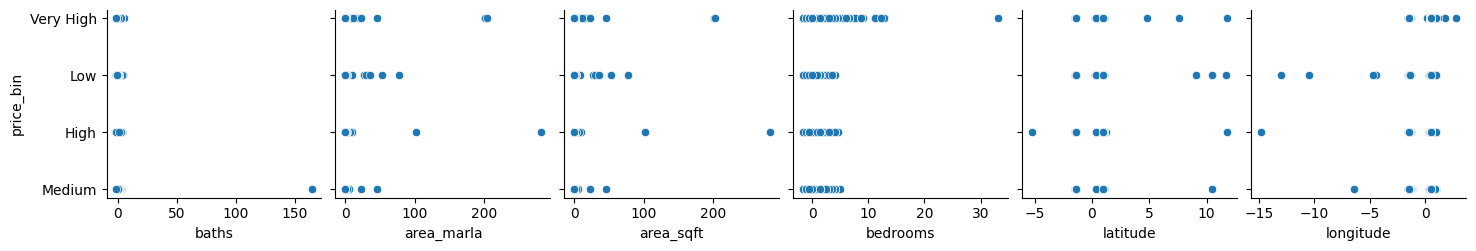

In [11]:
sns.pairplot(df, x_vars=['baths', 'area_marla', 'area_sqft', 'bedrooms', 'latitude', 'longitude'], y_vars=['price_bin'])

In [23]:

df['area_sqft_per_bedroom'] = df['area_sqft'] / df['bedrooms']

pca = PCA(n_components=2)
X = df.drop(['price_bin','agency','agent'], axis=1)
y = df['price_bin']
X_pca = pca.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.007157971733848846


In [18]:
X_train

,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,purpose_For Rent,purpose_For Sale,area_sqft_per_bedroom
63859,49000,0.392014,0.920851,-1.176827,-0.010316,-0.010316,-0.087849,2019,4,25,0,1,0,0,0,0,0,1,0,0.117429
40460,135000,-1.429345,-1.450933,0.876287,-0.001294,-0.001294,0.936532,2019,7,14,0,0,1,0,0,0,0,1,0,-0.001381
121574,11500000,0.369952,0.853449,0.055041,-0.021594,-0.021594,-0.087849,2019,7,1,0,0,1,0,0,0,0,0,1,0.245808
173511,13000000,0.349902,0.848638,0.465664,-0.014827,-0.014827,0.424342,2019,7,17,0,0,1,0,0,0,0,0,1,-0.034942
76624,30000000,0.370585,0.913299,0.876287,-0.003549,-0.003549,0.936532,2019,6,3,0,0,1,0,0,0,0,0,1,-0.003790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,12200000,-1.394330,-1.380257,0.465664,-0.010316,-0.010316,-0.087849,2019,6,29,0,1,0,0,0,0,0,0,1,0.117429
103694,50000,0.960862,0.470328,0.055041,-0.014827,-0.014827,-0.087849,2019,6,21,0,0,1,0,0,0,0,1,0,0.168780
131932,4800000,-1.449544,-1.459279,-0.355581,-0.027910,-0.027910,-0.600040,2019,7,4,0,1,0,0,0,0,0,0,1,0.046513
146867,5600000,0.936671,0.478828,-1.176827,-0.021594,-0.021594,0.424342,2019,7,9,0,0,1,0,0,0,0,0,1,-0.050888


In [22]:
import joblib
import pandas as pd

model = joblib.load('model.pkl')


new_data = pd.DataFrame({
    'latitude': [31.483],
    'longitude': [74.326],
    'baths': [3],
    'area_marla': [15],
    'area_sqft': [4080],
    'bedrooms': [5],
    'year': [2022],
    'month': [4],
    'day': [4],
    'property_type_Farm House': [0],
    'property_type_Flat': [0],
    'property_type_House': [1],
    'property_type_Lower Portion': [0],
    'property_type_Penthouse': [0],
    'property_type_Room': [0],
    'property_type_Upper Portion': [0],
    'purpose_For Rent': [0],
    'purpose_For Sale': [1],
    'area_sqft_per_bedroom': [816],
    'price':[2]
})


predictions = model.predict(new_data)

print(predictions)


['Very High']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
